In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars

        C:\Users\ckp43_000\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


List comprehension in Python is an easy and compact syntax for creating a list from a string or another list.
It is a veryconcise way to create a new list by performing an operation on each item in the existing list. 
List comprehension is considerably faster than processing a list using the for loop.

***Check Below--->>>***

**we are using here function 'rstrip'**

In [6]:
messages=[line.rstrip() for line in open("D:/DataScience_Udemy/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection")]

In [12]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

since here we can see '\t' means this a tab separated file or tsv 

later we will use ournpandas knowledge to read this file in and creating datarame from it

A lot of times when dealing with iterators, we also get a need to keep a count of iterations. Python eases the programmers’ task by providing a built-in function enumerate() for this task.
Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.

l1 = ["eat","sleep","repeat"] 
s1 = "geek"
  
# creating enumerate objects 
obj1 = enumerate(l1) 
obj2 = enumerate(s1) 
  
print "Return type:",type(obj1) 
print list(enumerate(l1)) 
  
# changing start index to 2 from 0 
print list(enumerate(s1,2)) 

Output:

Return type: < type 'enumerate' >
[(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
[(2, 'g'), (3, 'e'), (4, 'e'), (5, 'k')]

In [16]:
for msg_no,msg in enumerate(messages[:10]):
    print(msg_no,msg)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [4]:
import pandas as pd

In [5]:
messages=pd.read_csv("D:/DataScience_Udemy/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection",sep='\t',names=['label','message'])

In [6]:
messages.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
messages['length']=messages['message'].apply(len)

In [10]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%matplotlib inline

In [20]:
sns.set_style('whitegrid')

<AxesSubplot:ylabel='Frequency'>

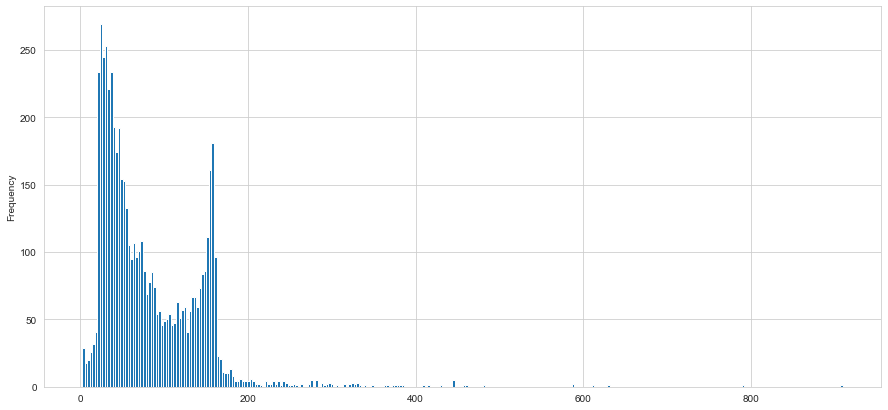

In [22]:
plt.figure(figsize=(15,7))
messages['length'].plot.hist(bins=300)

In [23]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [148]:
messages[messages['length']==910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object


In [34]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

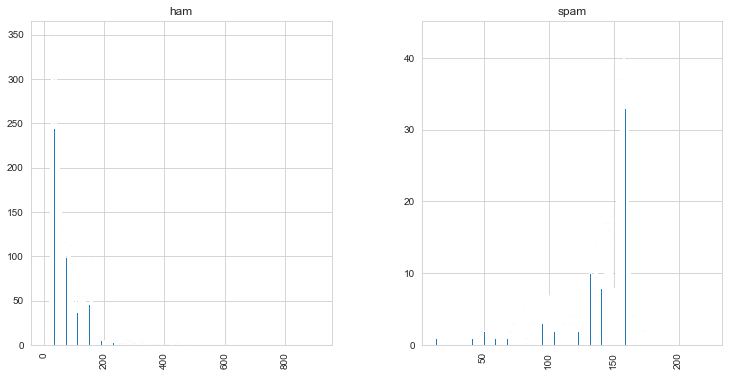

In [38]:
messages.hist(column='length',by='label',bins=250,figsize=(12,6))

#### in above two plots we can observe that length of 'spam' messages is bigger than that of 'ham' messages

In [149]:
import string

In [61]:
mess='sample message! notice it has :punctuation.'

In [41]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
nopunc=[c for c in mess if c not in string.punctuation]

In [63]:
nopunc

['s',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'n',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [64]:
nopunc=''.join(nopunc)

In [65]:
nopunc

'sample message notice it has punctuation'

In [48]:
x=['a','b','c','d']

In [49]:
''.join(x)

'abcd'

In [51]:
'+++'.join(x)

'a+++b+++c+++d'

In [52]:
'****'.join(x)

'a****b****c****d'

In [53]:
from nltk.corpus import stopwords

In [55]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [66]:
nopunc

'sample message notice it has punctuation'

In [67]:
nopunc.split()

['sample', 'message', 'notice', 'it', 'has', 'punctuation']

In [68]:
[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

['sample', 'message', 'notice', 'punctuation']

In [77]:
def text_process(mess):
    """
    1.remove punctuaion
    2.remove stop words
    3.return list of clean text words
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower not in stopwords.words('english')]

In [78]:
messages['message'].head(5).apply(text_process)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: message, dtype: object

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [81]:
print(len(bow_transformer.vocabulary_))

11747


In [82]:
mess4=messages['message'][3]

In [83]:
print(mess4)

U dun say so early hor... U c already then say...


In [85]:
bow4=bow_transformer.transform([mess4])

In [87]:
print(bow4)

  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1


In [89]:
print(bow4.shape)

(1, 11747)


In [91]:
bow_transformer.get_feature_names()[4221]

'U'

In [92]:
bow_transformer.get_feature_names()[9832]

'say'

In [93]:
message_bow=bow_transformer.transform(messages['message'])

In [94]:
print(message_bow.shape)

(5572, 11747)


Checking non zero words

***Check Below-->>>***

In [97]:
print(message_bow.nnz)

79463


In [100]:
sparsity=(100.0*message_bow.nnz/(message_bow.shape[0]*message_bow.shape[1]))
print('sparsity:{}'.format(sparsity))

sparsity:0.12140229049026034


In [103]:
import sklearn 

In [131]:
from sklearn.feature_extraction.text import TfidfTransformer

In [110]:
tfidf_transformer=TfidfTransformer().fit(message_bow)

In [111]:
tfidf4=tfidf_transformer.transform(bow4)

In [112]:
print(tfidf4)

  (0, 10703)	0.2214828525636521
  (0, 10174)	0.19345051326676527
  (0, 9832)	0.5147493130794172
  (0, 7427)	0.41952836023632145
  (0, 6447)	0.3046289560740644
  (0, 6427)	0.28629349827015765
  (0, 5476)	0.2841540501592932
  (0, 4828)	0.25442769469153637
  (0, 4221)	0.3902711884065556


In [114]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [115]:
message_tfidf=tfidf_transformer.transform(message_bow)

we will use naive bayes classifier

***Chek Below--->>>***

In [116]:
from sklearn.naive_bayes import MultinomialNB

In [117]:
spam_detect_model=MultinomialNB().fit(message_tfidf,messages['label'])

In [120]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [121]:
messages['label'][3]

'ham'

it's predicting correct

***Check above-->>>***

In [122]:
all_pred=spam_detect_model.predict(message_tfidf)

In [123]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [124]:
from sklearn.model_selection import train_test_split

In [126]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3)

In [127]:
msg_train

4143    Infact happy new year. How are you where are y...
4686    Alright we'll bring it to you, see you in like...
1770    Ha... Both of us doing e same thing. But i got...
743     Just got up. have to be out of the room very s...
3880    She left it very vague. She just said she woul...
                              ...                        
800               Gimme a few was  &lt;#&gt;  minutes ago
5038                         (You didn't hear it from me)
4305    Good good, billy mates all gone. Just been jog...
2509                                                Ok...
3669                    Thanks for loving me so. You rock
Name: message, Length: 3900, dtype: object

In [128]:
from sklearn.pipeline import Pipeline

In [136]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [137]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000000E49B858C18>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [139]:
predictions=pipeline.predict(msg_test)

In [138]:
from sklearn.metrics import classification_report

In [141]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1452
        spam       1.00      0.58      0.73       220

    accuracy                           0.94      1672
   macro avg       0.97      0.79      0.85      1672
weighted avg       0.95      0.94      0.94      1672



In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [144]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000000E49B858C18>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [145]:
predictions=pipeline.predict(msg_test)

In [146]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1452
        spam       1.00      0.76      0.86       220

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672

